### Linear Regression Example

First we are going to load in the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [5]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()


In [8]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [15]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['y'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [17]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age    442 non-null float64
sex    442 non-null float64
bmi    442 non-null float64
bp     442 non-null float64
s1     442 non-null float64
s2     442 non-null float64
s3     442 non-null float64
s4     442 non-null float64
s5     442 non-null float64
s6     442 non-null float64
y      442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


Text(0.5, 1.0, 'Histogram of outcome')

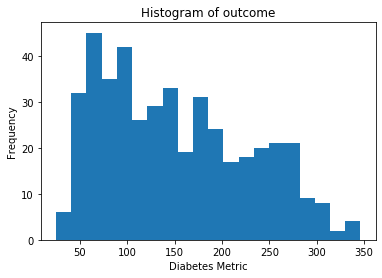

In [20]:
plt.hist(diabetes_df['y'], bins = 20)
plt.xlabel('Diabetes Metric')
plt.ylabel('Frequency')
plt.title('Histogram of outcome')

Text(0.5, 1.0, 'Histogram of LOG(outcome)')

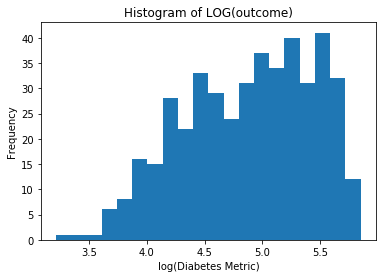

In [22]:
plt.hist(np.log(diabetes_df['y']), bins = 20)
plt.xlabel('log(Diabetes Metric)')
plt.ylabel('Frequency')
plt.title('Histogram of LOG(outcome)')

In [29]:
diabetes_df['log_y'] = np.log(diabetes_df['y'])

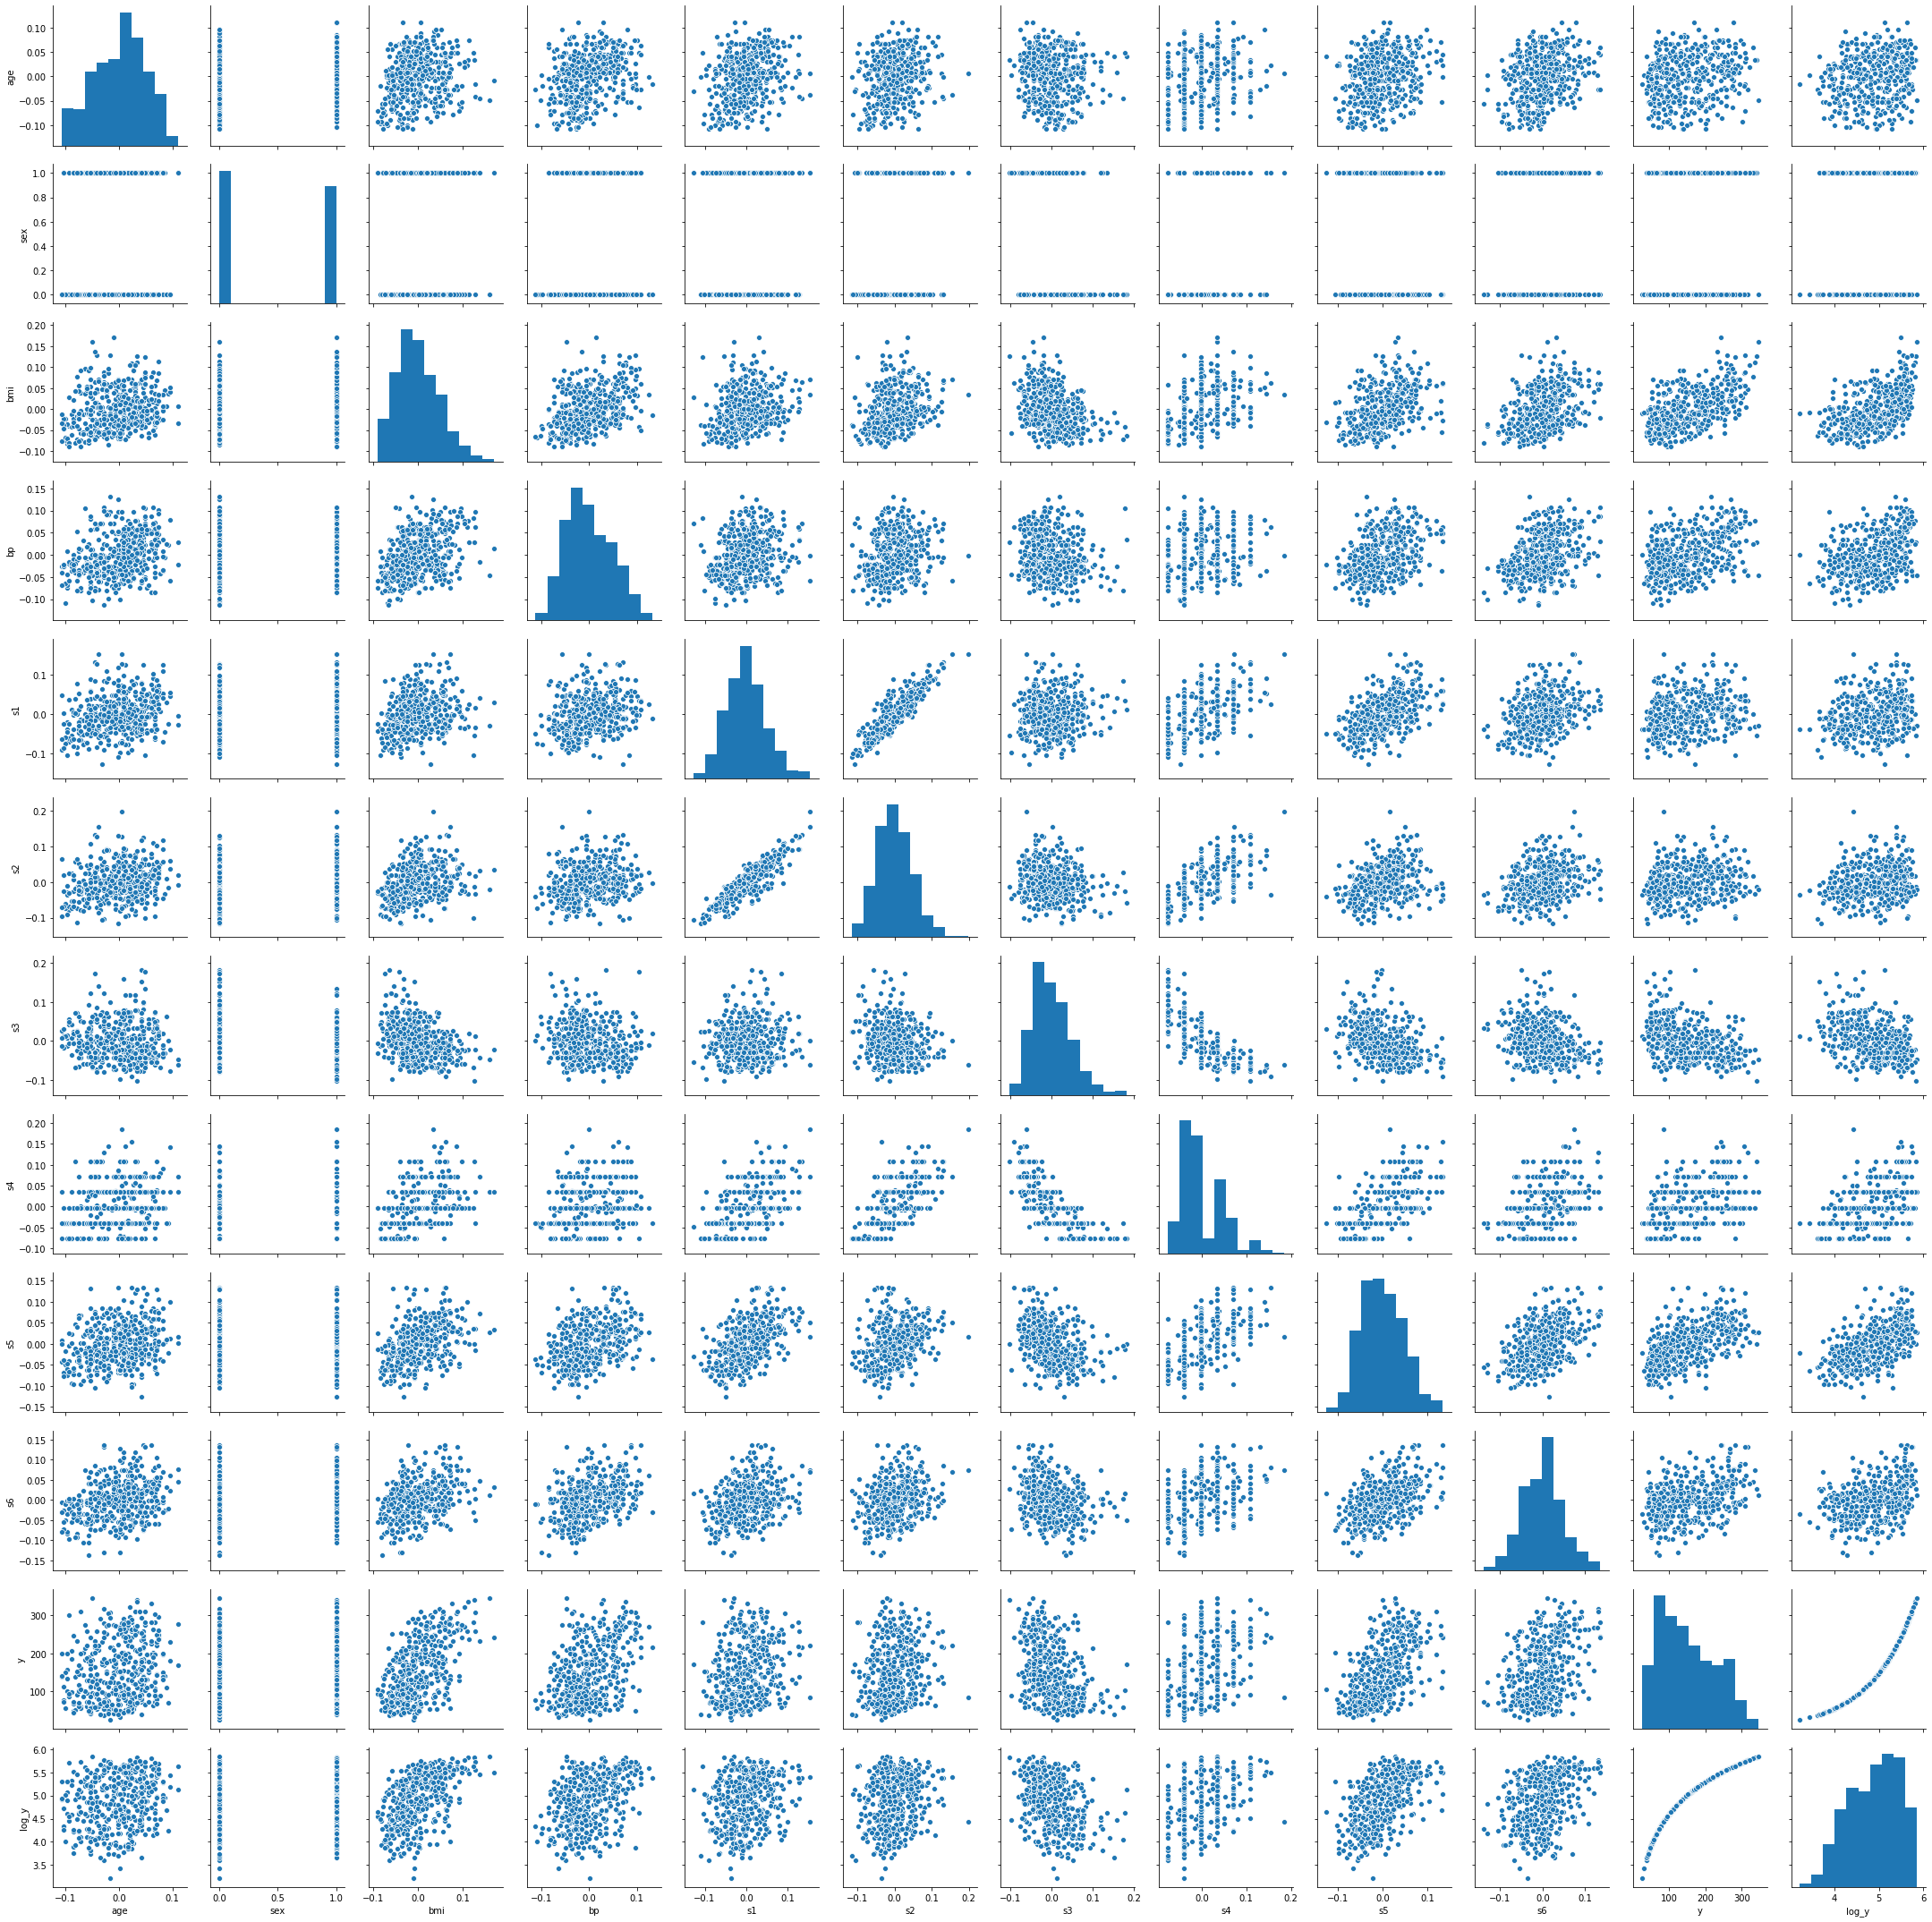

In [30]:
sns.pairplot(diabetes_df)

In [24]:
diabetes_df.sex.value_counts()

-0.044642    235
 0.050680    207
Name: sex, dtype: int64

In [27]:
## Not as informative, let's reclassify as 0 and 1.
diabetes_df['sex'] = np.where(diabetes_df['sex'] < 0, 0, 1)

Text(0.5, 1.0, 'Examining the relationship between BMI and outcome')

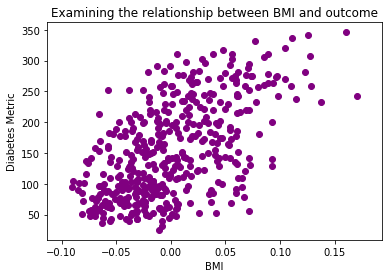

In [32]:
plt.scatter(diabetes_df['bmi'], diabetes_df['y'], color = 'purple')
plt.xlabel('BMI')
plt.ylabel('Diabetes Metric')
plt.title("Examining the relationship between BMI and outcome")

In [85]:
X = diabetes_df.drop(['y', 'log_y'], axis = 1).values
y = diabetes_df['y'].values
linear_model = LinearRegression()
linear_model.fit(X, y)
linear_model.score(X, y)

0.5177494254132934

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [87]:
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.5282621411648274

Lets plot the residuals

Text(0, 0.5, 'Residuals')

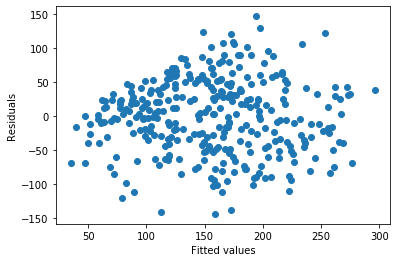

In [88]:
fitted = linear_model.predict(X_train)
residuals = fitted - y_train
plt.scatter(fitted, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')



A random plot of residuals is indicitive of a good linear fit. However our R^2 is pretty bad, let's try removing or changing some variables

Text(0, 0.5, 'S2 blood marker')

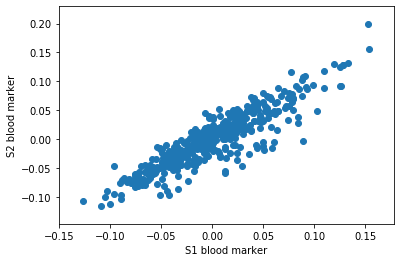

In [81]:
plt.scatter(diabetes_df['s1'], diabetes_df['s2'])
plt.xlabel("S1 blood marker")
plt.ylabel("S2 blood marker")

In [82]:
X = diabetes_df.drop(['y', 'log_y', 's1'], axis = 1).values
y = diabetes_df['y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.5282621411648281

Text(0, 0.5, 'Residuals')

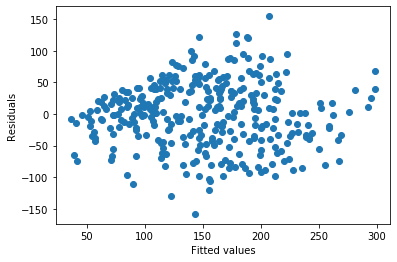

In [84]:
fitted = linear_model.predict(X_train)
residuals = fitted - y_train
plt.scatter(fitted, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')



0.3775916506471101